Low study time (<3 hours): [2.5, 1.5, 2.0, 2.5]
Moderate study time (3–5 hours): [3.5, 5.0, 4.0, 3.0, 4.5, 3.0, 4.0, 5.0, 3.5]
High study time (>5 hours): [5.5, 6.0]
Number of Low Study Days: 4
Number of Moderate Study Days: 9
Number of High Study Days: 2
Study time in minutes: [210.0, 300.0, 150.0, 240.0, 90.0, 180.0, 330.0, 120.0, 270.0, 180.0, 360.0, 150.0, 240.0, 300.0, 210.0]
Average Study Hours: 3.7
Average Entertainment Hours: 2.5
Average Sleep Hours: 7.17


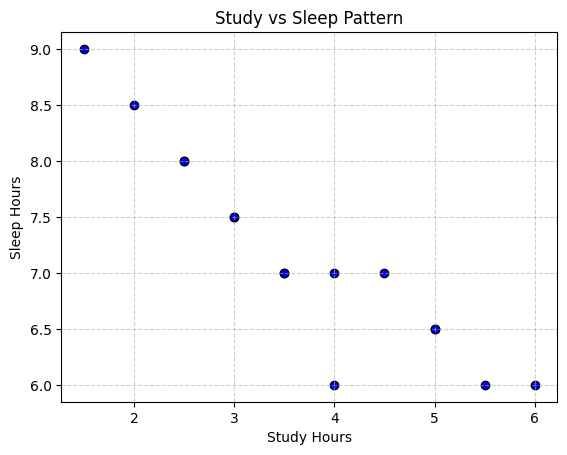

In [3]:
#TO - DO - Task
#Task 1
time_data = [
    (3.5, 2.0, 7.0), (5.0, 1.5, 6.5), (2.5, 3.0, 8.0),
    (4.0, 2.0, 6.0), (1.5, 4.5, 9.0), (3.0, 2.5, 7.5),
    (5.5, 1.0, 6.0), (2.0, 3.5, 8.5), (4.5, 2.0, 7.0),
    (3.0, 3.0, 7.5), (6.0, 1.5, 6.0), (2.5, 4.0, 8.0),
    (4.0, 2.5, 7.0), (5.0, 2.0, 6.5), (3.5, 2.5, 7.0)
]
#Creating empty lists
low = []
moderate = []
high = []

for data in time_data:
    study_time = data[0]
    if study_time < 3:
        low.append(study_time)
    elif study_time <= 5:
        moderate.append(study_time)
    else:
        high.append(study_time)

print("Low study time (<3 hours):", low)
print("Moderate study time (3–5 hours):", moderate)
print("High study time (>5 hours):", high)

# Task 2
print("Number of Low Study Days:", len(low))
print("Number of Moderate Study Days:", len(moderate))
print("Number of High Study Days:", len(high))

# Task 3
study_minutes = []
for data in time_data:
    study_hours = data[0]
    minutes = study_hours * 60
    study_minutes.append(minutes)

print("Study time in minutes:", study_minutes)

# Task 4
study_hours = []
entertainment_hours = []
sleep_hours = []

for data in time_data:
    study_hours.append(data[0])
    entertainment_hours.append(data[1])
    sleep_hours.append(data[2])

#Calculate average
avg_study = sum(study_hours) / len(study_hours)
avg_entertainment = sum(entertainment_hours) / len(entertainment_hours)
avg_sleep = sum(sleep_hours) / len(sleep_hours)

print("Average Study Hours:", round(avg_study, 2))
print("Average Entertainment Hours:", round(avg_entertainment, 2))
print("Average Sleep Hours:", round(avg_sleep, 2))

# Task 5
import matplotlib.pyplot as plt 

plt.scatter(study_hours, sleep_hours, color='blue', edgecolors='black')

plt.xlabel("Study Hours")
plt.ylabel("Sleep Hours")
plt.title("Study vs Sleep Pattern")

plt.grid(True, linestyle='--', alpha=0.6)

plt.show()



In [2]:
#Exercise - Recursion:
#Task 1
def sum_nested_list(nested_list):
    """
Calculate the sum of all numbers in a nested list.
This function takes a list that may contain integers and other nested lists.
It recursively traverses the list and sums all the integers, no matter how deeply
nested they are.
Args:
nested_list (list): A list that may contain integers or other lists of integers.
Returns:
int: The total sum of all integers in the nested list, including those in sublists
.
Example:
>>> sum_nested_list([1, [2, [3, 4], 5], 6, [7, 8]])
36
>>> sum_nested_list([1, [2, 3], [4, [5]]])
15
"""
    total = 0
    for element in nested_list:
        if isinstance(element, list): 
            total += sum_nested_list(element)
        else: 
            total += element
    return total

nested_list = [1, [2, [3, 4], 5], 6, [7, 8]]
print("Total Sum:", sum_nested_list(nested_list))


Total Sum: 36


In [6]:
#Task2
def generate_permutations(s):
    if len(s) <= 1:
        return [s]

    permutations = []
    for i, char in enumerate(s):
        remaining = s[:i] + s[i+1:]
        for p in generate_permutations(remaining):
            new_perm = char + p
            if new_perm not in permutations: 
                permutations.append(new_perm)
    return permutations

print(generate_permutations("abc"))
print(generate_permutations("aab"))

['abc', 'acb', 'bac', 'bca', 'cab', 'cba']
['aab', 'aba', 'baa']


In [7]:
#Task3
def calculate_directory_size(directory):
    total_size = 0
    for name, value in directory.items():
        if isinstance(value, dict):
            total_size += calculate_directory_size(value)
        else:
            total_size += value 
    return total_size

directory_structure = {
    "file1.txt": 200,
    "file2.txt": 300,
    "subdir1": {
        "file3.txt": 400,
        "file4.txt": 100
    },
    "subdir2": {
        "subsubdir1": {
            "file5.txt": 250
        },
        "file6.txt": 150
    }
}

print("Total Directory Size:", calculate_directory_size(directory_structure))


Total Directory Size: 1400


In [3]:
#Exercises - Dynamic Programming:
#Task 1
def min_coins(coins, amount):
    """
Finds the minimum number of coins needed to make up a given amount using dynamic
programming.
This function solves the coin change problem by determining the fewest number of
coins from a given set of coin denominations that sum up to a target amount. The
solution uses dynamic programming(tabulation) to iteratively build up the minimum
number of coins required for each amount.
Parameters:
coins (list of int): A list of coin denominations available for making change. Each
coin denomination is a positive integer.

23

5CS037 - 2025 Worksheet - 0 Siman Giri

amount (int): The target amount for which we need to find the minimum number of coins
. It must be a non-negative integer.
Returns:
int: The minimum number of coins required to make the given amount.
If it is not possible to make the amount with the given coins, returns -1.
Example:
>>> min_coins([1, 2, 5], 11)
3
>>> min_coins([2], 3)
-1
"""
    dp = [float('inf')] * (amount + 1)
    dp[0] = 0  

    for coin in coins:
        for i in range(coin, amount + 1):
            dp[i] = min(dp[i], dp[i - coin] + 1)

    return dp[amount] if dp[amount] != float('inf') else -1

coins = [1, 2, 5]
amount = 13
print("Minimum coins needed:", min_coins(coins, amount)) 

Minimum coins needed: 4


In [12]:
#Task 2
def longest_common_subsequence(s1, s2):
    m, n = len(s1), len(s2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if s1[i - 1] == s2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])

    return dp[m][n]

s1 = "abcde"
s2 = "ace"
print("LCS length:", longest_common_subsequence(s1, s2))  


LCS length: 3


In [13]:
#Task 3
def knapsack_max(weights_list, values_list, max_weight):
    n_items = len(weights_list)
    dp_table = [[0] * (max_weight + 1) for _ in range(n_items + 1)]

    for i in range(1, n_items + 1):
        for w in range(max_weight + 1):
            if weights_list[i - 1] <= w:
                dp_table[i][w] = max(
                    dp_table[i - 1][w],
                    dp_table[i - 1][w - weights_list[i - 1]] + values_list[i - 1]
                )
            else:
                dp_table[i][w] = dp_table[i - 1][w]

    return dp_table[n_items][max_weight]

weights_new = [2, 3, 5, 7]
values_new = [10, 5, 15, 7]
capacity_new = 10
print("Maximum knapsack value:", knapsack_max(weights_new, values_new, capacity_new))


Maximum knapsack value: 30
